## Week 2 Hackathon: Wela Loans

Questions to answer:
1. Wela Credit’s CEO wants to know what are the customer profiles(s) for which a loan should not be granted given higher risk of a loan default? What is the strengths of your recommendation? <br>
2. Under the Act in which created the National Credit Information System, banks who refuse loan requests must provide the customer with a reason based on his/her last 3 years of credit history. Do you have enough information to provide the rationale for loan refusal. And if not, what other information will you seek out for? <br>
3. Based on your findings, what are the other types of non-traditional sources of credit data you would recommend Wela Credit to seek out for in making a loan decision?


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
applications = pd.read_csv('applications.csv')

In [3]:
applications.columns

Index(['Unnamed: 0', 'LOAN_ID', 'LOAN_DEFAULT', 'CONTRACT_TYPE', 'GENDER',
       'OWN_CAR', 'OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=123)

In [4]:
applications

,Unnamed: 0,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,"100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100007,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,"100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,100009,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,8,100010,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,100012,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
applications = applications.drop(columns='Unnamed: 0')

In [6]:
pd.set_option('display.max_columns', 150)

In [7]:
applications.head()

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,"100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0

In [29]:
app = applications[~applications['LOAN_ID'].str.contains(',') == True]
app = app.drop(columns='Unnamed: 0')
app.to_csv(r'C:\Users\207915\Documents\Eskwelabs\02_hackathon\clean.csv', index=False, header=True)

In [69]:
app_with_comma = applications.loc[applications['LOAN_ID'].str.contains(',') == True, "LOAN_ID"]
loan_list = app_with_comma.str.split(',', expand=True)
list(loan_list)
loan_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08303696739132256,0.2629485927471776,0.13937578009978951,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"""Stone","brick""",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,None
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"""Spouse","partner""",State servant,Secondary / secondary special,Married,House / apartment,0.035792000000000004,-16941,-1588,-4970.0,-477,,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,,0.3542247319929012,0.6212263380626669,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,None
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.04622,-17718,-7804,-8751.0,-1259,,1,1,0,1,1,0,Laborers,1.0,1,1,FRIDAY,13,0,0,0,0,0,0,Housing,,0.7064284028871654,0.5567274263630174,0.0278,0.0617,0.9881,0.8368,0.0018,0.0,0.1034,0.0833,0.125,0.0279,0.0227,0.029,0.0,0.0,0.0284,0.064,0.9881,0.8432,0.0018,0.0,0.1034,0.0833,0.125,0.0286,0.0248,0.0302,0.0,0.0,0.0281,0.0617,0.9881,0.8390000000000001,0.0018,0.0,0.1034,0.0833,0.125,0.0284,0.0231,0.0295,0.0,0.0,reg oper account,block of flats,0.0238,"""Stone","brick""",No,8.0,0.0,8.0,0.0,-239.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,7.0,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.5656548824667073,0.11337451271992707,,0.0722,0.0801,0.9781,0.7008,,0.0,0.1379,0.1667,0.0417,0.0534,0.0588,0.0619,0.0,0.0,0.0735,0.0831,0.9782,0.7125,,0.0,0.1379,0.1667,0.0417,0.0546,0.0643,0.0645,0.0,0.0,0.0729,0.0801,0.9781,0.7048,,0.0,0.1379,0.1667,0.0417,0.0543,0.0599,0.063,0.0,0.0,reg oper account,block of flats,0.053,"""Stone","brick""",No,0.0,0.0,0.0,0.0,-296.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,,,,,None
25,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-19334,-3494,-2419.0,-2893,,1,1,0,1,1,0,Cleaning staff,2.0,2,2,SATURDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.5619484093041138,0.6514056365297631,0.4614823912998385,0.0722,0.0147,0.9781,0.7008,0.001,0.0,0.1379,0.1667,0.0417,0.0498,0.0588,0.067,0.0,0.0,0.0735,0.0153,0.9782,0.7125,0.001,0.0,0.1379,0.1667,0.0417,0.0509,0.0643,0.0698,0.0,0.0,0.0729,0.0147,0.9781,0.7048,0.001,0.0,0.1379,0.1667,0.0417,0.0506,0.0599,0.0682,0.0,0.0,reg oper account,block of flats,0.0533,"""Stone","brick""",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
34,100040,0,Cash loans,F,N,Y,0,135000.0,1125000.0,32895.0,1125000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.019688999999999998,-15997,-4585,-5735.0,-4067,,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,14,0,0,0,0,0,0,Security Ministries,,0.17249750814777715,,0.0825,0.0804,0.9762,0.6736,0.0056,0

In [70]:
import csv
with open('unclean.csv', 'w') as loan:
    for row in loan_list:
        loan_writer = csv.writer(loan, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        loan_writer.writerow([row])

In [180]:
app_with_comma = applications.loc[applications['LOAN_ID'].str.contains(',') == True]
app = applications[~applications['LOAN_ID'].str.contains(',') == True]
app_with_comma = app_with_comma[~app_with_comma['LOAN_ID'].str.contains('Spouse')]
loan_list = app_with_comma['LOAN_ID'].str.split(',', expand=True)

In [181]:
loan_list=loan_list.drop(columns=122)

In [182]:
cols = applications.columns.tolist()
loan_list.columns = cols

In [190]:
final_app = pd.concat([app, loan_list])
final_app = final_app.sort_values('LOAN_ID')

In [206]:
final_app

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08303696739132256,0.2629485927471776,0.13937578009978951,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"""Stone","brick""",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000,1.2935e+06,35698.5,1.1295e+06,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0,0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [207]:
final_app.to_csv(r'C:\Users\207915\Documents\Python_sandbox\final_applications.csv', index=False, header=True)

## Cleaned data

For simplicity purposes, I just dropped the rows that has NaN value

In [72]:
applications = pd.read_csv('applications.csv')
app = applications[~applications['LOAN_ID'].str.contains(',') == True]
print(applications.shape)
app.shape

(30751, 123)


(23397, 123)

In [73]:
app = app.drop(columns='Unnamed: 0')
pd.set_option('display.max_columns', 150)
app

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Week 2 Hackathon: Wela Loans

Questions to answer:
1. Wela Credit’s CEO wants to know what are the customer profiles(s) for which a loan should not be granted given higher risk of a loan default? What is the strengths of your recommendation? <br>
2. Under the Act in which created the National Credit Information System, banks who refuse loan requests must provide the customer with a reason based on his/her last 3 years of credit history. Do you have enough information to provide the rationale for loan refusal. And if not, what other information will you seek out for? <br>
3. Based on your findings, what are the other types of non-traditional sources of credit data you would recommend Wela Credit to seek out for in making a loan decision?

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Right way to Clean Data

In [4]:
#read csv
df_applications = pd.read_csv('applications.csv',index_col=0)

#filter rows to be fixed by checking Nans on GENDER colulmn
df_NAN = df_applications[df_applications.GENDER.isna()]['LOAN_ID']

# why str.split() won't work
# in the column WALLSMATERIAL_MODE, a value can be "Stone, brick".
# when split is applied the string is also split but it should be
# a single value. Thats why there are extra columns added when split
# is used. One column for Stone and one column for brick

#write to csv
with open('fixed.csv',mode='w') as f:
    for r in df_NAN:
        f.write(r)
        f.write('\n')
        
#read back csv into dataframe
df_NAN_fixed = pd.read_csv('fixed.csv',header=None)

df_not_NAN = df_applications[~df_applications.GENDER.isna()]
df_NAN_fixed.columns = df_not_NAN.columns
final_df = df_not_NAN.append(df_NAN_fixed)

final_df

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,100007,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100009,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,41301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
8,100010,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,100012,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,20250.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11,100014,0.0,Cash loans,F,N,Y,1.0,112500.000,652500.0,21177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,100015,0.0,Cash loans,F,N,Y,0.0,38419.155,148365.0,10678.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
len(final_df['LOAN_ID'])

30751

In [6]:
app = final_df

## Prompt 1:
1. Use head(), shape, describe() methods and attributes to inspect the data
2. Find missing values and decide if you want to remove/impute/extrapolate those values
3. Group and aggregate data (you can choose any columns for that) - I will use *GENDER*, *AMT_INCOME_TOTAL*, and *AMT_CREDIT*

**The goal of our group is to discover the relationship of loan default to following variables**:<br>
- *Contract Type (CONTRACT_TYPE)*: Identification if loan is cash or revolving
- *Approval Status of previous applications ()*:
- *Income source (NAME_INCOME_TYPE, OCCUPATION_TYPE)*: Clients income type (businessman, working, maternity leave,…) and What kind of occupation does the client have

In [7]:
cols = ['LOAN_ID', 'LOAN_DEFAULT', 'GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']
app = app[cols]
display(app)
app.info()

,LOAN_ID,LOAN_DEFAULT,GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,CONTRACT_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE
2,100003,0.0,F,270000.000,1293502.5,Cash loans,State servant,Core staff
3,100004,0.0,M,67500.000,135000.0,Revolving loans,Working,Laborers
4,100006,0.0,F,135000.000,312682.5,Cash loans,Working,Laborers
5,100007,0.0,M,121500.000,513000.0,Cash loans,Working,Core staff
7,100009,0.0,F,171000.000,1560726.0,Cash loans,Commercial associate,Accountants
8,100010,0.0,M,360000.000,1530000.0,Cash loans,State servant,Managers
9,100011,0.0,F,112500.000,1019610.0,Cash loans,Pensioner,NaN
10,100012,0.0,M,135000.000,405000.0,Revolving loans,Working,Laborers
11,100014,0.0,F,112500.000,652500.0,Cash loans,Working,Core staff
12,100015,0.0,F,38419.155,148365.0,Cash loans,Pensioner,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30751 entries, 2 to 7353
Data columns (total 8 columns):
LOAN_ID             30751 non-null object
LOAN_DEFAULT        30751 non-null float64
GENDER              30751 non-null object
AMT_INCOME_TOTAL    30751 non-null float64
AMT_CREDIT          30751 non-null float64
CONTRACT_TYPE       30751 non-null object
NAME_INCOME_TYPE    30751 non-null object
OCCUPATION_TYPE     21075 non-null object
dtypes: float64(3), object(5)
memory usage: 2.1+ MB


I will clean the column names and the type of columns, so it will become easier to us later

In [8]:
cols = ['id', 'default', 'gender', 'income', 'credit', 'contract_type', 'income_type', 'occupation_type']
app.columns = cols
app.columns

Index(['id', 'default', 'gender', 'income', 'credit', 'contract_type',
       'income_type', 'occupation_type'],
      dtype='object')

In [9]:
app['default'] = app['default'].astype('int')
app['income'] = app['income'].astype('int')
app['credit'] = app['credit'].astype('int')
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30751 entries, 2 to 7353
Data columns (total 8 columns):
id                 30751 non-null object
default            30751 non-null int32
gender             30751 non-null object
income             30751 non-null int32
credit             30751 non-null int32
contract_type      30751 non-null object
income_type        30751 non-null object
occupation_type    21075 non-null object
dtypes: int32(3), object(5)
memory usage: 1.8+ MB


C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

We should manipulate the dataframe to group the additional columns and analyze the relationship of all the columns to loan default

In [10]:
app.columns

Index(['id', 'default', 'gender', 'income', 'credit', 'contract_type',
       'income_type', 'occupation_type'],
      dtype='object')

In [11]:
display(app.default.value_counts())
display(app.contract_type.value_counts())
display(app.income_type.value_counts())
display(app.occupation_type.value_counts())

0    28287
1     2464
Name: default, dtype: int64

Cash loans         27784
Revolving loans     2967
Name: contract_type, dtype: int64

Working                 16009
Commercial associate     7048
Pensioner                5551
State servant            2136
Unemployed                  3
Student                     2
Businessman                 2
Name: income_type, dtype: int64

Laborers                 5492
Sales staff              3211
Core staff               2754
Managers                 2076
Drivers                  1853
High skill tech staff    1146
Accountants               976
Medicine staff            875
Security staff            684
Cooking staff             583
Cleaning staff            441
Private service staff     288
Low-skill Laborers        243
Waiters/barmen staff      135
Secretaries               131
Realty agents              80
HR staff                   57
IT staff                   50
Name: occupation_type, dtype: int64

In [12]:
app_dummy = pd.get_dummies(app, columns=['default'])
app_dummy

,id,gender,income,credit,contract_type,income_type,occupation_type,default_0,default_1
2,100003,F,270000,1293502,Cash loans,State servant,Core staff,1,0
3,100004,M,67500,135000,Revolving loans,Working,Laborers,1,0
4,100006,F,135000,312682,Cash loans,Working,Laborers,1,0
5,100007,M,121500,513000,Cash loans,Working,Core staff,1,0
7,100009,F,171000,1560726,Cash loans,Commercial associate,Accountants,1,0
8,100010,M,360000,1530000,Cash loans,State servant,Managers,1,0
9,100011,F,112500,1019610,Cash loans,Pensioner,NaN,1,0
10,100012,M,135000,405000,Revolving loans,Working,Laborers,1,0
11,100014,F,112500,652500,Cash loans,Working,Core staff,1,0
12,100015,F,38419,148365,Cash loans,Pensioner,NaN,1,0


## Bar charts

Exploring income type

In [13]:
app_per_income = app_dummy.groupby('income_type')[['default_0', 'default_1']].sum()
app_per_income = app_per_income.sort_values('default_1')
app_per_income

,default_0,default_1
income_type,,
Businessman,2.0,0.0
Student,2.0,0.0
Unemployed,2.0,1.0
State servant,2022.0,114.0
Pensioner,5235.0,316.0
Commercial associate,6524.0,524.0
Working,14500.0,1509.0


In [13]:
# would like to sort the bar graph by the percentage of the good payers, so we can see the relative amount
app_per_income['default_1_perc'] = round((app_per_income['default_1']  / (app_per_income['default_1'] + app_per_income['default_1'])) *100, 2)

In [14]:
app_per_income

,default_0,default_1,default_1_perc
income_type,,,
Businessman,2.0,0.0,NaN
Student,2.0,0.0,NaN
Unemployed,2.0,1.0,50.0
State servant,2022.0,114.0,50.0
Pensioner,5235.0,316.0,50.0
Commercial associate,6524.0,524.0,50.0
Working,14500.0,1509.0,50.0


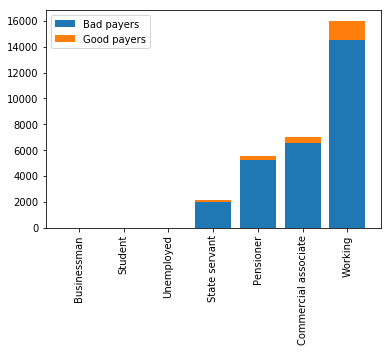

In [14]:
# Creating a stacked bar charts
fig, ax = plt.subplots()
ax.set_xticklabels(app_per_income.index, rotation=90)  # categorical variables are in index
# Add bars for "y-var1" with the label "Gold"
ax.bar(app_per_income.index, app_per_income["default_0"], label="Bad payers")
# Stack bars for "Silver" on top with label "Silver"
ax.bar(app_per_income.index, app_per_income["default_1"], bottom=app_per_income["default_0"], label="Good payers")

ax.legend()
plt.show()

Exploring occupation type

In [15]:
app_per_occupation = app_dummy.groupby('occupation_type')[['default_0', 'default_1']].sum()
app_per_occupation = app_per_occupation.sort_values('default_1')
app_per_occupation

,default_0,default_1
occupation_type,,
Secretaries,127.0,4.0
IT staff,46.0,4.0
HR staff,50.0,7.0
Realty agents,72.0,8.0
Waiters/barmen staff,118.0,17.0
Private service staff,262.0,26.0
Low-skill Laborers,199.0,44.0
Cleaning staff,396.0,45.0
Accountants,923.0,53.0


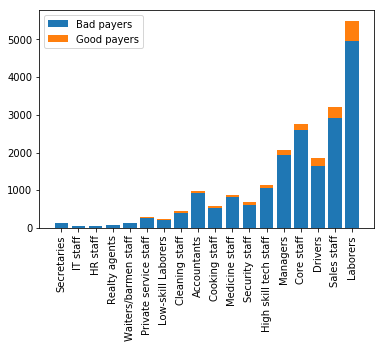

In [16]:
# Creating a stacked bar charts
fig, ax = plt.subplots()
ax.set_xticklabels(app_per_occupation.index, rotation=90)  # categorical variables are in index
# Add bars for "y-var1" with the label "Gold"
ax.bar(app_per_occupation.index, app_per_occupation["default_0"], label="Bad payers")
# Stack bars for "Silver" on top with label "Silver"
ax.bar(app_per_occupation.index, app_per_occupation["default_1"], bottom=app_per_occupation["default_0"], label="Good payers")

ax.legend()
plt.show()

Exploring the contract type

In [17]:
app_per_contract = app_dummy.groupby('contract_type')[['default_0', 'default_1']].sum()
app_per_contract = app_per_contract.sort_values('default_1')
app_per_contract

,default_0,default_1
contract_type,,
Revolving loans,2831.0,136.0
Cash loans,25456.0,2328.0


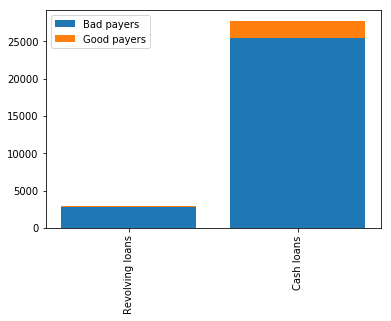

In [18]:
# Creating a stacked bar charts
fig, ax = plt.subplots()
ax.set_xticklabels(app_per_contract.index, rotation=90)  # categorical variables are in index
# Add bars for "y-var1" with the label "Gold"
ax.bar(app_per_contract.index, app_per_contract["default_0"], label="Bad payers")
# Stack bars for "Silver" on top with label "Silver"
ax.bar(app_per_contract.index, app_per_contract["default_1"], bottom=app_per_contract["default_0"], label="Good payers")

ax.legend()
plt.show()

[Text(0, 0, 'State servant'),
 Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Businessman')]

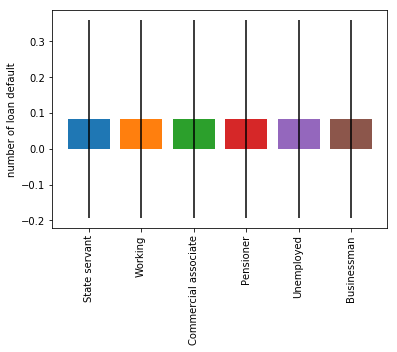

In [25]:
# Extract the column with finite categorical variables
cat_column = app["income_type"]
# Find the unique values of the categorical column
cats = cat_column.unique()

fig, ax = plt.subplots()

# Loop over the different sports branches
for cat in cats:
  # Extract the rows only for this sport
  cat_df = app[app["income_type"] == cat]
  # Add a bar for the y-var mean with std y error bar
  ax.bar(cat, app["default"].mean(), yerr=app["default"].std())

ax.set_ylabel("number of loan default")
ax.set_xticklabels(cats, rotation=90)

## Distribution charts

In [19]:
app

,id,default,gender,income,credit,contract_type,income_type,occupation_type
2,100003,0,F,270000,1293502,Cash loans,State servant,Core staff
3,100004,0,M,67500,135000,Revolving loans,Working,Laborers
4,100006,0,F,135000,312682,Cash loans,Working,Laborers
5,100007,0,M,121500,513000,Cash loans,Working,Core staff
7,100009,0,F,171000,1560726,Cash loans,Commercial associate,Accountants
8,100010,0,M,360000,1530000,Cash loans,State servant,Managers
9,100011,0,F,112500,1019610,Cash loans,Pensioner,NaN
10,100012,0,M,135000,405000,Revolving loans,Working,Laborers
11,100014,0,F,112500,652500,Cash loans,Working,Core staff
12,100015,0,F,38419,148365,Cash loans,Pensioner,NaN


C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

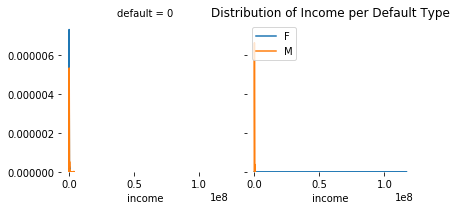

In [20]:
plt.figure(10)
g = sns.FacetGrid(app, col='default', hue='gender')
g.map(sns.kdeplot, "income", shade=True)
plt.legend(loc='upper left')
plt.title('Distribution of Income per Default Type')
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

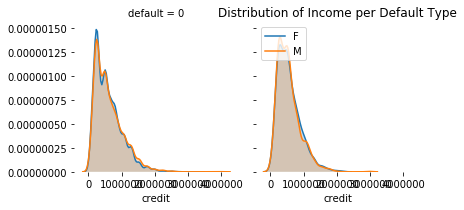

In [22]:
plt.figure(10)
g = sns.FacetGrid(app, col='default', hue='gender')
g.map(sns.kdeplot, "credit", shade=True)
plt.legend(loc='upper left')
plt.title('Distribution of Income per Default Type')
sns.despine(left=True, bottom=True)
plt.show()

## Incoporating the previous.csv

In [23]:
previous = pd.read_csv('previous_application.csv')
previous = previous.drop(columns='Unnamed: 0')

In [24]:
cols = ['LOAN_ID', 'NAME_CONTRACT_STATUS', 'CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT']
previous =  previous[cols]
col_name = ['id', 'prev_status', 'prev_contract_type', 'prev_amount', 'prev_credit']
previous.columns = col_name
display(previous.head())
app.head()

,id,prev_status,prev_contract_type,prev_amount,prev_credit
0,108129,Approved,Cash loans,607500.0,679671.0
1,125157,Approved,Consumer loans,99319.5,109809.0
2,118974,Approved,Consumer loans,55831.5,60745.5
3,120854,Approved,Revolving loans,0.0,675000.0
4,133853,Approved,Consumer loans,104809.5,121410.0


,id,default,gender,income,credit,contract_type,income_type,occupation_type
2,100003,0,F,270000,1293502,Cash loans,State servant,Core staff
3,100004,0,M,67500,135000,Revolving loans,Working,Laborers
4,100006,0,F,135000,312682,Cash loans,Working,Laborers
5,100007,0,M,121500,513000,Cash loans,Working,Core staff
7,100009,0,F,171000,1560726,Cash loans,Commercial associate,Accountants


In [25]:
# pd.concat([app, previous], join='inner')
# pd.merge(app, previous, how='inner', on='id')
display(app['id'].dtypes)
previous['id'].dtypes

dtype('O')

dtype('int64')

I cannot merge them because of the difference between the dtypes of the 2 dataframes

In [26]:
app['id'] = app['id'].astype('int64')
display(app['id'].dtypes)
previous['id'].dtypes

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


dtype('int64')

dtype('int64')

In [27]:
app['name'] = 'current'
previous['name'] = 'previous'

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Merge previous dataframe into the app dataframe by using id

In [28]:
merged = pd.merge(app, previous, how='inner', on='id')
merged.head()

,id,default,gender,income,credit,contract_type,income_type,occupation_type,name_x,prev_status,prev_contract_type,prev_amount,prev_credit,name_y
0,100003,0,F,270000,1293502,Cash loans,State servant,Core staff,current,Approved,Cash loans,900000.0,1035882.0,previous
1,100003,0,F,270000,1293502,Cash loans,State servant,Core staff,current,Approved,Consumer loans,337500.0,348637.5,previous
2,100004,0,M,67500,135000,Revolving loans,Working,Laborers,current,Approved,Consumer loans,24282.0,20106.0,previous
3,100006,0,F,135000,312682,Cash loans,Working,Laborers,current,Approved,Cash loans,675000.0,675000.0,previous
4,100006,0,F,135000,312682,Cash loans,Working,Laborers,current,Canceled,Revolving loans,0.0,0.0,previous


melt the columns prev_amount, prev_credit and credit  so I can create slope chart between prev_credit - credit and prpev_amount - credit

In [29]:
cols = ['default', 'gender', 'contract_type', 'income_type']
prev_credit = pd.melt(merged, id_vars=cols, value_vars=['prev_credit', 'credit'])
prev_amount = pd.melt(merged, id_vars=cols, value_vars=['prev_amount', 'credit'])

Creating the slope plot without any filters

In [30]:
prev_credit

,default,gender,contract_type,income_type,variable,value
0,0,F,Cash loans,State servant,prev_credit,1035882.000
1,0,F,Cash loans,State servant,prev_credit,348637.500
2,0,M,Revolving loans,Working,prev_credit,20106.000
3,0,F,Cash loans,Working,prev_credit,675000.000
4,0,F,Cash loans,Working,prev_credit,0.000
5,0,F,Cash loans,Working,prev_credit,267930.000
6,0,F,Cash loans,Working,prev_credit,270000.000
7,0,M,Cash loans,Working,prev_credit,180000.000
8,0,M,Cash loans,Working,prev_credit,284400.000
9,0,M,Cash loans,Working,prev_credit,274288.500


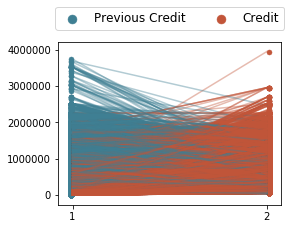

In [31]:
# single category slope plot
red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
i = 1.0
#for site, subdf in df.groupby('site'):
    #sites.append(site)
    # Get the values for healthy and disease patients
h = prev_credit.query('variable == "prev_credit"')['value'].values
d = prev_credit.query('variable == "credit"')['value'].values

    # Set up the x-axis values
x1 = 1
x2 = 2

    # Set up line color
line_colors = (h - d) > 0
line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
alphas = [0.4]*len(line_colors)

    # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points
    # Note: s=25 increase the default point size, lw=0.5 decreases the default
    # point line width
ax.scatter(len(h)*[x1-0.01], h, c=blue,
               s=25, lw=0.5, label='Previous Credit')
ax.scatter(len(d)*[x2+0.01], d, c=red,
               s=25, lw=0.5, label='Credit')

    # Update x-axis
i += 1

# Fix the axes and labels
ax.set_xticks([1, 2])
#_ = ax.set_xticklabels(sites, fontsize='x-large')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
              fontsize='large',
              loc='upper center',
              bbox_to_anchor=(0.5, 1.25),
              ncol=2,
              scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]

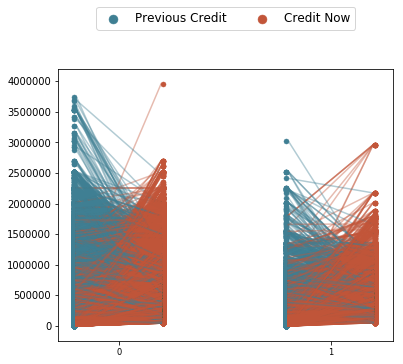

In [33]:
# multiple category 
red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(6, 5))

# Set up list to track sites
cats = []
i = 1.0
for cat, subdf in prev_credit.groupby('default'):
    cats.append(cat)
    # Get the values for healthy and disease patients
    h = subdf.query('variable == "prev_credit"')['value'].values
    d = subdf.query('variable == "credit"')['value'].values

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)

    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points
    # Note: s=25 increase the default point size, lw=0.5 decreases the default
    # point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
               s=25, lw=0.5, label='Previous Credit')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
               s=25, lw=0.5, label='Credit Now')

    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels(cats, fontsize='small',)

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
              fontsize='large',
              loc='upper center',
              bbox_to_anchor=(0.5, 1.25),
              ncol=2,
              scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]

## Incorporating bureau and bureau_balance
This will provide us a reason when a customer loan is refused

In [97]:
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
display(bureau)
display(bureau_balance)

,Unnamed: 0,LOAN_ID,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,1,119939,5714566,Closed,currency 1,-2279,0,-1945.0,-2033.0,0.000,0,39541.500,0.000,0.000,0.0,Consumer credit,-2033,NaN
1,2,119939,5714567,Closed,currency 1,-2247,0,-1123.0,-1733.0,0.000,0,135000.000,0.000,0.000,0.0,Credit card,-1733,NaN
2,3,119939,5714568,Closed,currency 1,-1447,0,-331.0,-1272.0,0.000,0,99000.000,-2692.170,137692.170,0.0,Credit card,-1272,NaN
3,4,119939,5714569,Closed,currency 1,-1390,0,-331.0,-1263.0,0.000,0,135000.000,-149.040,135149.040,0.0,Credit card,-1263,NaN
4,5,119939,5714570,Active,currency 1,-1390,0,-696.0,NaN,0.000,0,4500.000,-2.565,2.565,0.0,Credit card,-691,NaN
5,6,119939,5714571,Active,currency 1,-733,0,1100.0,NaN,0.000,0,337500.000,242596.395,94903.605,0.0,Credit card,-687,NaN
6,7,119939,5714573,Closed,currency 1,-1188,0,1369.0,-1090.0,NaN,0,450000.000,0.000,0.000,0.0,Consumer credit,-429,NaN
7,8,119939,5714574,Closed,currency 1,-437,0,1389.0,-225.0,NaN,0,1226250.000,0.000,0.000,0.0,Consumer credit,-194,NaN
8,9,119939,5714575,Closed,currency 1,-944,0,335.0,-548.0,NaN,0,1215000.000,0.000,0.000,0.0,Consumer credit,-513,NaN
9,10,119939,5714577,Active,currency 1,-1102,0,4.0,NaN,NaN,0,225000.000,210730.500,0.000,0.0,Credit card,-10,NaN


,Unnamed: 0,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,1,5718865,0,X
1,2,5718865,-1,0
2,3,5718865,-2,0
3,4,5718865,-3,0
4,5,5718865,-4,0
5,6,5718865,-5,0
6,7,5718865,-6,0
7,8,5718865,-7,0
8,9,5718865,-8,0
9,10,5718865,-9,0


# Pie and Bar Charts

In [ ]:
applications = pd.read_csv('applications.csv')
applications
applications3 = pd.read_csv('applications3.csv', delimiter=';')
applications3.head(201)
previous_application = pd.read_csv('previous_application.csv')
previous_application

In [ ]:
merge2 = merge.loc[:, ['LOAN_ID', 'LOAN_DEFAULT', 'GENDER', 'CONTRACT_TYPE_x', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]
merge2.head()

In [ ]:
plt.figure(figsize=(8,6))
merge2.groupby('NAME_CONTRACT_STATUS')['NAME_CONTRACT_STATUS'].count().sort_values(ascending=False).plot.bar()
plt.title('Status of Previous Application')
plt.xlabel('Loan Status')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(8,6))
merge2.groupby('LOAN_DEFAULT')['LOAN_DEFAULT'].count().sort_values(ascending=False).plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize=(8,6))
merge2.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count().sort_values(ascending=False).plot.pie()

In [ ]:
plt.figure(figsize=(8,6))
merge2.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count().sort_values(ascending=True).plot.barh()
plt.xlabel('Count')
plt.title('Occupation of Lenders')
plt.ylabel('Occupation')
plt.tick_params(bottom="off", top="off", left="off", right="off")
plt.show()

In [ ]:
Default = ['Bad Payer','Good Payer']
Count = [3913,48609]
plt.pie(Count, labels=['Good Payer: 7.5%', 'Bad Payer: 92.5%'])
plt.title('Good Payer vs Bad Payer')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
merge2.groupby('CONTRACT_TYPE_x')['CONTRACT_TYPE_x'].count().sort_values(ascending=False).plot.pie()

#  Scatterplot and others

In [ ]:
scatterplot = sns.lmplot(x='AMT_CREDIT_new', y='AMT_ANNUITY', hue = 'LOAN_DEFAULT' , data = df_[df_['NAME_CONTRACT_STATUS']=='Approved'])
scatterplot.set_xticklabels(rotation=90)

In [ ]:
scatterplot2 = sns.lmplot(x='AMT_CREDIT_new', y='AMT_ANNUITY', hue = 'LOAN_DEFAULT' , data = df_[df_['NAME_CONTRACT_STATUS']=='Approved'])
scatterplot2.set_xticklabels(rotation=90)df_